In [ ]:
# Title cell - markdown
"""
# Trader Behavior vs Market Sentiment
Notebook: notebook_1.ipynb
Author: <shubham_baddipalli>
Repo: ds_<shubham_baddipalli>
"""


'\n# Trader Behavior vs Market Sentiment\nNotebook: notebook_1.ipynb\nAuthor: <shubham_baddipalli>\nRepo: ds_<shubham_baddipalli>\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
ROOT = "/content/drive/MyDrive/ds_<your_full_name>"  # <- change to your folder name in Drive
CSV_DIR = os.path.join(ROOT, "csv_files")
OUT_DIR = os.path.join(ROOT, "outputs")

# create if not present (safe)
os.makedirs(CSV_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)

print("CSV_DIR:", CSV_DIR)
print("OUT_DIR:", OUT_DIR)


CSV_DIR: /content/drive/MyDrive/ds_<your_full_name>/csv_files
OUT_DIR: /content/drive/MyDrive/ds_<your_full_name>/outputs


In [ ]:
# Install extra libs if you need (uncomment to install)
# !pip install pandas matplotlib seaborn plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)


In [ ]:
# Replace these names with your uploaded filenames
trades_fp = os.path.join(CSV_DIR, "/content/historical_data.csv")
sent_fp   = os.path.join(CSV_DIR, "/content/fear_greed_index.csv")

# quick existence check
print("Trades exists:", os.path.exists(trades_fp))
print("Sentiment exists:", os.path.exists(sent_fp))

# load safely with try/except
trades = pd.read_csv(trades_fp, low_memory=False)
sentiment = pd.read_csv(sent_fp, low_memory=False)

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)


Trades exists: True
Sentiment exists: True
Trades shape: (172624, 16)
Sentiment shape: (2644, 4)


In [ ]:
trades.head(100).to_csv(os.path.join(CSV_DIR, "trades_preview.csv"), index=False)
sentiment.head(100).to_csv(os.path.join(CSV_DIR, "sentiment_preview.csv"), index=False)


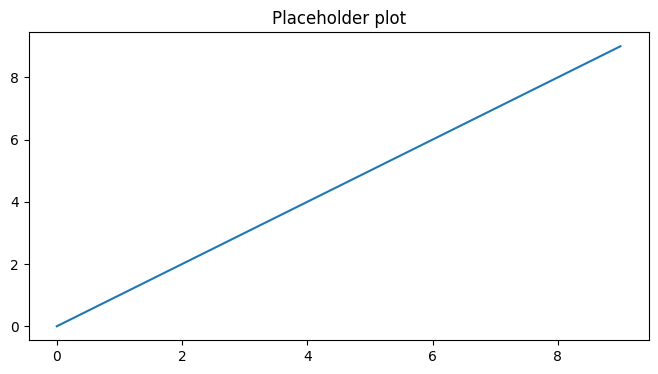

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(10), range(10))  # placeholder – replace with real plot later
plt.title("Placeholder plot")
plt.savefig(os.path.join(OUT_DIR, "placeholder_plot.png"))


In [ ]:
import os
ROOT = "/content/drive/MyDrive/ds_shubham_baddipalli"   # <-- change to your folder
CSV_DIR = os.path.join(ROOT, "csv_files")
OUT_DIR = os.path.join(ROOT, "outputs")
os.makedirs(CSV_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)
print("CSV_DIR:", CSV_DIR)


CSV_DIR: /content/drive/MyDrive/ds_shubham_baddipalli/csv_files


In [ ]:
import pandas as pd
import os, sys

# Replace with your actual filenames
TRADES_FILE = os.path.join(CSV_DIR, "/content/historical_data.csv")
SENT_FILE   = os.path.join(CSV_DIR, "/content/fear_greed_index.csv")

for fp in [TRADES_FILE, SENT_FILE]:
    print(fp, "exists?", os.path.exists(fp))

# Helper to read with fallback
def read_csv_fallback(fp, **kwargs):
    try:
        df = pd.read_csv(fp, **kwargs)
        print(f"Loaded {fp} with shape {df.shape}")
        return df
    except Exception as e:
        print("Direct read failed:", e)
        print("Attempting chunked read...")
        chunks = []
        for chunk in pd.read_csv(fp, chunksize=200000, **kwargs):
            chunks.append(chunk)
        df = pd.concat(chunks, ignore_index=True)
        print(f"Loaded by chunks: {df.shape}")
        return df

# Load files
trades = read_csv_fallback(TRADES_FILE, low_memory=False)
sentiment = read_csv_fallback(SENT_FILE, low_memory=False)


/content/historical_data.csv exists? True
/content/fear_greed_index.csv exists? True
Loaded /content/historical_data.csv with shape (181921, 16)
Loaded /content/fear_greed_index.csv with shape (2644, 4)


In [ ]:
# Quick inspection
print("=== Trades head ===")
display(trades.head())
print("\nTrades info:")
display(trades.info(memory_usage='deep'))
print("\nMissing value counts (trades):")
display(trades.isna().sum().sort_values(ascending=False).head(30))

print("\n=== Sentiment head ===")
display(sentiment.head())
print("\nSentiment info:")
display(sentiment.info())
print("\nMissing value counts (sentiment):")
display(sentiment.isna().sum())


=== Trades head ===


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12



Trades info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181921 entries, 0 to 181920
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           181921 non-null  object 
 1   Coin              181921 non-null  object 
 2   Execution Price   181921 non-null  float64
 3   Size Tokens       181921 non-null  float64
 4   Size USD          181921 non-null  float64
 5   Side              181921 non-null  object 
 6   Timestamp IST     181921 non-null  object 
 7   Start Position    181920 non-null  float64
 8   Direction         181920 non-null  object 
 9   Closed PnL        181920 non-null  float64
 10  Transaction Hash  181920 non-null  object 
 11  Order ID          181920 non-null  float64
 12  Crossed           181920 non-null  object 
 13  Fee               181920 non-null  float64
 14  Trade ID          181920 non-null  float64
 15  Timestamp         181920 non-null  float64
dtypes: flo

None


Missing value counts (trades):


,0
Start Position,1
Trade ID,1
Fee,1
Crossed,1
Order ID,1
Transaction Hash,1
Closed PnL,1
Direction,1
Timestamp,1
Timestamp IST,0



=== Sentiment head ===


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Sentiment info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None


Missing value counts (sentiment):


,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
# Normalize column names
def normalize_cols(df):
    df = df.copy()
    df.columns = [str(c).strip().lower().replace(" ", "_").replace("-", "_") for c in df.columns]
    return df

trades = normalize_cols(trades)
sentiment = normalize_cols(sentiment)
print("Columns (trades):", trades.columns.tolist())
print("Columns (sentiment):", sentiment.columns.tolist())


Columns (trades): ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']
Columns (sentiment): ['timestamp', 'value', 'classification', 'date']


In [ ]:
# Identify likely datetime columns
# For trades, common column name 'time' or 'timestamp'
time_cols = [c for c in trades.columns if 'time' in c or 'date' in c or 'timestamp' in c]
print("Possible time columns in trades:", time_cols)

# Parse trade time (adjust this name if your dataset uses another)
# Use 'timestamp_ist' as it contains readable date and time strings
trade_time_col = 'timestamp_ist'
trades[trade_time_col] = pd.to_datetime(trades[trade_time_col], format='%d-%m-%Y %H:%M', errors='coerce')
print(trade_time_col, "parsed. Nulls:", trades[trade_time_col].isna().sum())

# For sentiment dataset find 'date' column
sent_date_col = None
for c in sentiment.columns:
    if 'date' == c:
        sent_date_col = c
        break
    if 'date' in c:
        sent_date_col = c

if sent_date_col is None:
    raise ValueError("No date-like column found in sentiment file. Check column names:", sentiment.columns.tolist())

sentiment[sent_date_col] = pd.to_datetime(sentiment[sent_date_col], errors='coerce')
print(sent_date_col, "parsed. Nulls:", sentiment[sent_date_col].isna().sum())

# Create 'date' (no time) column for both (use local date)
trades['date'] = trades[trade_time_col].dt.date
sentiment['date'] = sentiment[sent_date_col].dt.date

Possible time columns in trades: ['timestamp_ist', 'timestamp', 'date']
timestamp_ist parsed. Nulls: 0
date parsed. Nulls: 0


In [ ]:
import numpy as np

def clean_numeric(col):
    # remove commas, currency symbols, percent signs and convert
    return (col.astype(str)
              .str.replace(r'[,₹$€]', '', regex=True)
              .str.replace('%','', regex=False)
              .str.replace('—','', regex=False)
              .replace({'nan':'', 'None':''})
              .replace('', np.nan))

# Columns likely to be numeric - adjust names if different
num_candidates = ['execution_price', 'price', 'size', 'closedpnl', 'leverage', 'qty', 'quantity']
existing_num_cols = [c for c in trades.columns if c in num_candidates]
print("Numeric candidates found in trades:", existing_num_cols)

for c in existing_num_cols:
    trades[c] = clean_numeric(trades[c])
    trades[c] = pd.to_numeric(trades[c], errors='coerce')

# Downcast floats/ints to save memory where possible
for c in existing_num_cols:
    if pd.api.types.is_float_dtype(trades[c].dtype):
        trades[c] = pd.to_numeric(trades[c], downcast='float')
    elif pd.api.types.is_integer_dtype(trades[c].dtype):
        trades[c] = pd.to_numeric(trades[c], downcast='integer')

print("After numeric conversion:")
display(trades[existing_num_cols].describe().T)


Numeric candidates found in trades: ['execution_price']
After numeric conversion:


,count,mean,std,min,25%,50%,75%,max
execution_price,181921.0,12352.748305,30518.613063,0.000005,3.8178,19.363,124.94,109004.0


In [ ]:
cat_cols = ['side', 'symbol', 'account', 'event', 'start_position']
for c in cat_cols:
    if c in trades.columns:
        trades[c] = trades[c].astype(str).str.strip().str.lower().replace({'nan': None, 'none': None})

# Normalize side values to 'buy'/'sell' or 'long'/'short' depending on dataset
if 'side' in trades.columns:
    trades['side'] = trades['side'].replace({
        'b': 'buy', 's': 'sell', '1': 'buy', '0': 'sell',
        'long': 'buy', 'short': 'sell'
    }).astype('category')

print("Unique sides:", trades['side'].unique() if 'side' in trades.columns else "no side")
print("Sample symbols:", trades['symbol'].unique()[:10] if 'symbol' in trades.columns else "no symbol")


Unique sides: ['buy', 'sell']
Categories (2, object): ['buy', 'sell']
Sample symbols: no symbol


In [ ]:
# duplicates
before = len(trades)
trades = trades.drop_duplicates()
after = len(trades)
print(f"Dropped {before-after} exact duplicate rows")

# drop trades with missing essential fields (account or time or size)
essential = []
if 'account' in trades.columns: essential.append('account')
if trade_time_col: essential.append(trade_time_col)
if 'size' in trades.columns: essential.append('size')

print("Essentials:", essential)
trades = trades.dropna(subset=essential)
print("Shape after dropping rows missing essential fields:", trades.shape)


Dropped 0 exact duplicate rows
Essentials: ['account', 'timestamp_ist']
Shape after dropping rows missing essential fields: (70981, 17)


In [ ]:
# Profit flag
if 'closedpnl' in trades.columns:
    trades['profit_flag'] = (trades['closedpnl'] > 0).astype('int8')
    trades['pnl_sign'] = trades['closedpnl'].apply(lambda x: 'positive' if pd.notna(x) and x>0 else ('negative' if pd.notna(x) and x<0 else 'zero_or_na'))

# Trade notional: size * execution_price (if both exist)
if 'size' in trades.columns and ('execution_price' in trades.columns or 'price' in trades.columns):
    price_col = 'execution_price' if 'execution_price' in trades.columns else 'price'
    trades['trade_value'] = trades['size'] * trades[price_col]
    trades['trade_value'] = pd.to_numeric(trades['trade_value'], errors='coerce')

# Leverage bucket
if 'leverage' in trades.columns:
    trades['leverage'] = pd.to_numeric(trades['leverage'], errors='coerce')
    trades['leverage_bucket'] = pd.cut(trades['leverage'].fillna(0),
                                       bins=[-0.1, 1, 5, 10, 25, 100, 1000],
                                       labels=['0-1','1-5','5-10','10-25','25-100','100+'],
                                       include_lowest=True)

# Basic summaries
print("Profit rate overall:", trades['profit_flag'].mean() if 'profit_flag' in trades.columns else "N/A")
print("Sample leverage distribution:")
if 'leverage_bucket' in trades.columns:
    display(trades['leverage_bucket'].value_counts(dropna=False))


Profit rate overall: N/A
Sample leverage distribution:


In [ ]:
# Inspect sentiment unique values
print("Sentiment unique values:", sentiment.columns.tolist())
# Assuming sentiment has columns: date, classification (fear/greed)
# Find classification-like column
sent_class_col = None
for c in sentiment.columns:
    if 'class' in c or 'classification' in c or 'sent' in c:
        sent_class_col = c
        break
if sent_class_col is None:
    # fallback: take the second column if first is date
    possible = [c for c in sentiment.columns if c != 'date']
    sent_class_col = possible[0] if possible else None

print("Using sentiment class column:", sent_class_col)
# Normalize values
if sent_class_col:
    sentiment[sent_class_col] = sentiment[sent_class_col].astype(str).str.strip().str.lower()
    # Map common variants
    sentiment[sent_class_col] = sentiment[sent_class_col].replace({
        'fearful':'fear', 'greedy':'greed', 'neutral':'neutral'
    })
    sentiment = sentiment.rename(columns={sent_class_col:'classification'})
    print("Classification value counts:")
    display(sentiment['classification'].value_counts(dropna=False))


Sentiment unique values: ['timestamp', 'value', 'classification', 'date']
Using sentiment class column: classification
Classification value counts:


,count
classification,
fear,781
greed,633
extreme fear,508
neutral,396
extreme greed,326


In [ ]:
# Merge on date
merged = trades.merge(sentiment[['date','classification']].drop_duplicates(), on='date', how='left')

print("Merged shape:", merged.shape)
print("Rows without sentiment:", merged['classification'].isna().sum())
display(merged[['date','classification']].drop_duplicates().head(10))


Merged shape: (70981, 18)
Rows without sentiment: 37397


,date,classification
0,2024-02-12,greed
44,2024-03-12,extreme greed
189,2024-04-12,extreme greed
190,2025-04-03,fear
211,2025-05-03,NaN
220,2025-11-03,NaN
224,2025-08-04,NaN
257,2025-09-04,NaN
270,2025-10-04,NaN
289,2025-12-04,NaN


In [ ]:
CLEAN_TRADES = os.path.join(CSV_DIR, "trades_cleaned.csv")
MERGED_FP = os.path.join(CSV_DIR, "trades_with_sentiment.csv")
sent_fp_out = os.path.join(CSV_DIR, "sentiment_cleaned.csv")

trades.to_csv(CLEAN_TRADES, index=False)
merged.to_csv(MERGED_FP, index=False)
sentiment.to_csv(sent_fp_out, index=False)

print("Saved:", CLEAN_TRADES)
print("Saved:", MERGED_FP)
print("Saved:", sent_fp_out)


Saved: /content/drive/MyDrive/ds_shubham_baddipalli/csv_files/trades_cleaned.csv
Saved: /content/drive/MyDrive/ds_shubham_baddipalli/csv_files/trades_with_sentiment.csv
Saved: /content/drive/MyDrive/ds_shubham_baddipalli/csv_files/sentiment_cleaned.csv


In [ ]:
# Basic counts
print("Total trades:", len(trades))
print("Unique accounts:", trades['account'].nunique() if 'account' in trades.columns else "no account")
print("Unique symbols:", trades['symbol'].nunique() if 'symbol' in trades.columns else "no symbol")

# PnL summary by sentiment
if 'classification' in merged.columns and 'closedpnl' in merged.columns:
    pnl_by_sent = merged.groupby('classification')['closedpnl'].agg(['count','sum','mean','median','std'])
    display(pnl_by_sent)

# Win rate by sentiment
if 'classification' in merged.columns and 'profit_flag' in merged.columns:
    winrate = merged.groupby('classification')['profit_flag'].agg(['count','mean'])
    winrate = winrate.rename(columns={'mean':'win_rate'})
    display(winrate)

# Average leverage by sentiment
if 'classification' in merged.columns and 'leverage' in merged.columns:
    lev = merged.groupby('classification')['leverage'].agg(['count','mean','median'])
    display(lev)

# Top 10 accounts by total pnl
if 'account' in merged.columns and 'closedpnl' in merged.columns:
    top_accounts = merged.groupby('account')['closedpnl'].sum().sort_values(ascending=False).head(10)
    display(top_accounts)


Total trades: 70981
Unique accounts: 27
Unique symbols: no symbol


In [ ]:
# run at top of the notebook
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import os
ROOT = "/content/drive/MyDrive/ds_shubham_baddipalli"  # update if needed
CSV_DIR = os.path.join(ROOT, "csv_files")
OUT_DIR = os.path.join(ROOT, "outputs")


In [ ]:
print(trades.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date']


In [ ]:
# Use your dataset
df = merged.copy()

# Rename columns to standardized names for pipeline compatibility
df = df.rename(columns={
    'coin': 'symbol',
    'timestamp': 'time', # Renaming 'timestamp' to 'time'
    'size_usd': 'trade_value',  # direct value column
    'closed_pnl': 'closedpnl'
})

# --- Add diagnostic prints here ---
print("Columns in df after renaming:")
print(df.columns.tolist())
# --- End diagnostic prints ---

# Create size column from tokens
df['size'] = df['size_tokens']

# Convert time to datetime
# Check if 'time' column exists before converting
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'], errors='coerce')
else:
    print("❌ 'time' column not found after renaming. Cannot convert to datetime.")


# Create profit flag (1=profit, 0=loss)
df['profit_flag'] = (df['closedpnl'] > 0).astype(int)

# Ensure key columns exist
required = ['account','symbol','time','size','trade_value','closedpnl','side','classification']
for c in required:
    if c not in df.columns:
        print("❌ Missing:", c)
    else:
        print("✅ Found:", c)

display(df.head())

Columns in df after renaming:
['account', 'symbol', 'execution_price', 'size_tokens', 'trade_value', 'side', 'timestamp_ist', 'start_position', 'direction', 'closedpnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'time', 'date', 'classification']
✅ Found: account
✅ Found: symbol
✅ Found: time
✅ Found: size
✅ Found: trade_value
✅ Found: closedpnl
✅ Found: side
✅ Found: classification


,account,symbol,execution_price,size_tokens,trade_value,side,timestamp_ist,start_position,direction,closedpnl,transaction_hash,order_id,crossed,fee,trade_id,time,date,classification,size,profit_flag
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,2024-02-12 22:50:00+00:00,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-02-12,greed,986.87,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,2024-02-12 22:50:00+00:00,986.5245955,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-02-12,greed,16.00,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,2024-02-12 22:50:00+00:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-02-12,greed,144.09,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,2024-02-12 22:50:00+00:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-02-12,greed,142.98,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,2024-02-12 22:50:00+00:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-02-12,greed,8.73,0


In [ ]:
# Drop trades with no time or no account
df = df.dropna(subset=['time','account'])

# If size missing, set to 0 (rare in trading logs)
df['size'] = df['size'].fillna(0)

# If trade value missing, set to 0 (rare)
df['trade_value'] = df['trade_value'].fillna(0)

# Keep closed pnl NA as flag
df['closedpnl_missing'] = df['closedpnl'].isna().astype(int)

# Fill missing pnl with 0 for analysis continuity
df['closedpnl'] = df['closedpnl'].fillna(0)


In [ ]:
# Absolute PnL
df['abs_pnl'] = df['closedpnl'].abs()

# Percentage PnL relative to trade value (avoid divide by zero)
df['pnl_pct'] = np.where(df['trade_value'] > 0,
                         df['closedpnl'] / df['trade_value'],
                         0)

# Time features
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek  # Monday=0
df['month'] = df['time'].dt.month


In [ ]:
account_stats = df.groupby('account').agg({
    'closedpnl': ['sum','mean','median','std'],
    'profit_flag': ['mean'],      # winrate
    'trade_value': ['sum','mean'],
    'size': ['sum','mean'],
    'abs_pnl': ['mean','max','sum']
})

account_stats.columns = ['_'.join(a) for a in account_stats.columns]
account_stats = account_stats.reset_index()
account_stats = account_stats.rename(columns={'profit_flag_mean':'win_rate'})

account_stats.head()


,account,closedpnl_sum,closedpnl_mean,closedpnl_median,closedpnl_std,win_rate,trade_value_sum,trade_value_mean,size_sum,size_mean,abs_pnl_mean,abs_pnl_max,abs_pnl_sum
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.359428e+06,501.263878,0.00000,4917.710509,0.435472,44909646.86,16559.604299,3.903899e+04,14.394906,705.946210,135329.090100,1.914526e+06
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,5.392785e+03,3.117217,0.00000,144.724233,0.468786,3489279.37,2016.924491,1.673984e+06,967.620854,24.992645,3003.330755,4.323728e+04
2,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,4.132956e+04,9.598132,0.00000,169.591101,0.461217,1933028.00,448.915002,5.790728e+06,1344.804550,22.037972,7784.162915,9.489551e+04
3,0x2c229d22b100a7beb69122eed721cee9b24011dd,7.632372e+04,85.182721,0.87142,380.350854,0.531250,2329587.51,2599.986060,3.847677e+07,42942.824571,96.329383,6608.942866,8.631113e+04
4,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5.388765e+04,-143.700387,0.00000,548.048407,0.237333,599966.15,1599.909733,3.740311e+06,9974.163968,212.006403,4317.480000,7.950240e+04


In [ ]:
account_stats.to_csv(os.path.join(CSV_DIR,"account_stats.csv"), index=False)


In [ ]:
df['date'] = pd.to_datetime(df['date'])

daily_stats = df.groupby(['date','classification']).agg({
    'closedpnl': ['sum','mean'],
    'profit_flag': 'mean',
    'trade_value': 'sum'
})

daily_stats.columns = ['_'.join(a) for a in daily_stats.columns]
daily_stats = daily_stats.reset_index()

daily_stats.head()


,date,classification,closedpnl_sum,closedpnl_mean,profit_flag_mean,trade_value_sum
0,2023-01-05,fear,0.000000,0.000000,0.000000,477.00
1,2023-05-12,neutral,0.000000,0.000000,0.000000,50005.83
2,2024-01-01,greed,-129.531460,-7.196192,0.055556,264239.53
3,2024-01-02,greed,0.000000,0.000000,0.000000,2008.18
4,2024-01-03,greed,8244.241409,60.176945,0.934307,472974.70


In [ ]:
df['date'] = pd.to_datetime(df['date'])

daily_stats = df.groupby(['date','classification']).agg({
    'closedpnl': ['sum','mean'],
    'profit_flag': 'mean',
    'trade_value': 'sum'
})

daily_stats.columns = ['_'.join(a) for a in daily_stats.columns]
daily_stats = daily_stats.reset_index()

daily_stats.head()


,date,classification,closedpnl_sum,closedpnl_mean,profit_flag_mean,trade_value_sum
0,2023-01-05,fear,0.000000,0.000000,0.000000,477.00
1,2023-05-12,neutral,0.000000,0.000000,0.000000,50005.83
2,2024-01-01,greed,-129.531460,-7.196192,0.055556,264239.53
3,2024-01-02,greed,0.000000,0.000000,0.000000,2008.18
4,2024-01-03,greed,8244.241409,60.176945,0.934307,472974.70


In [ ]:
df = df.sort_values(['account','time'])

# Calculate rolling statistics by grouping by account and applying rolling on the time index within each group
def calculate_rolling(group):
    group_indexed = group.set_index('time')
    group['rolling_7d_pnl'] = group_indexed['closedpnl'].rolling('7D').sum().reset_index(drop=True)
    group['rolling_7d_trades'] = group_indexed['trade_value'].rolling('7D').sum().reset_index(drop=True)
    group['rolling_7d_winrate'] = group_indexed['profit_flag'].rolling('7D').mean().reset_index(drop=True)
    return group

df = df.groupby('account').apply(calculate_rolling)

# Reset index if apply created a MultiIndex
if isinstance(df.index, pd.MultiIndex):
    df = df.reset_index(level=0, drop=True)

/tmp/ipython-input-3420942521.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('account').apply(calculate_rolling)


In [ ]:
sent_map = {'fear':-1, 'greed':1, 'neutral':0}
df['sentiment_numeric'] = df['classification'].map(sent_map)


In [ ]:
processed_path = os.path.join(CSV_DIR, "trades_processed.csv")
df.to_csv(processed_path, index=False)
processed_path


'/content/drive/MyDrive/ds_shubham_baddipalli/csv_files/trades_processed.csv'

In [ ]:
print("Total Trades:", len(df))
print("Unique Accounts:", df['account'].nunique())
print("Unique Coins:", df['symbol'].nunique())

print("\nWin rate by sentiment:")
print(df.groupby('classification')['profit_flag'].mean())

print("\nAverage PnL by sentiment:")
print(df.groupby('classification')['closedpnl'].mean())


Total Trades: 70981
Unique Accounts: 27
Unique Coins: 182

Win rate by sentiment:
classification
extreme fear     0.352484
extreme greed    0.555060
fear             0.395572
greed            0.435762
neutral          0.504438
Name: profit_flag, dtype: float64

Average PnL by sentiment:
classification
extreme fear       7.055332
extreme greed    206.477543
fear             126.612787
greed             67.265107
neutral           27.609742
Name: closedpnl, dtype: float64


In [ ]:
# Ensure time column is datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Ensure date from trade timestamp
df['date'] = df['time'].dt.date

# Ensure sentiment date is datetime.date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date'] = sentiment['date'].dt.date

In [ ]:
# normalize sentiment classification
sentiment['classification'] = (
    sentiment['classification']
    .str.strip()
    .str.lower()
    .replace({
        'fearful':'fear',
        'extreme fear':'fear',
        'greedy':'greed',
        'extreme greed':'greed',
        'neutral':'neutral'
    })
)


In [ ]:
# Create full date range
full_dates = pd.DataFrame({
    'date': pd.date_range(
        start=sentiment['date'].min(),
        end=df['date'].max()
    ).date
})

# Merge & forward fill missing sentiment
sent_full = full_dates.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
).fillna(method='ffill').fillna(method='bfill')


/tmp/ipython-input-1892364360.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ).fillna(method='ffill').fillna(method='bfill')


In [ ]:
df = df.merge(sent_full, on='date', how='left')


In [ ]:
sent_map = {'fear': -1, 'neutral': 0, 'greed': 1}
# Add a print statement to check columns
print("Columns in df before sentiment mapping:")
print(df.columns)
df['sentiment_numeric'] = df['classification_y'].map(sent_map)

Columns in df before sentiment mapping:
Index(['account', 'symbol', 'execution_price', 'size_tokens', 'trade_value',
       'side', 'timestamp_ist', 'start_position', 'direction', 'closedpnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'time',
       'date', 'classification_x', 'size', 'profit_flag', 'closedpnl_missing',
       'abs_pnl', 'pnl_pct', 'hour', 'dayofweek', 'month', 'rolling_7d_pnl',
       'rolling_7d_trades', 'rolling_7d_winrate', 'sentiment_numeric',
       'classification_y'],
      dtype='object')


In [ ]:
df = df.sort_values(['account','time'])
df['sentiment_prev'] = df.groupby('account')['sentiment_numeric'].shift(1)
df['sentiment_prev'].fillna(df['sentiment_numeric'], inplace=True)


/tmp/ipython-input-3915292210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment_prev'].fillna(df['sentiment_numeric'], inplace=True)


In [ ]:
print(df[['date','classification_y','sentiment_numeric','sentiment_prev']].head())

print("Trades without sentiment label:",
      df['classification_y'].isna().sum())

         date classification_y  sentiment_numeric  sentiment_prev
0  1970-01-01              NaN                NaN             NaN
1  1970-01-01              NaN                NaN             NaN
2  1970-01-01              NaN                NaN             NaN
3  1970-01-01              NaN                NaN             NaN
4  1970-01-01              NaN                NaN             NaN
Trades without sentiment label: 70981


In [ ]:
df.to_csv(os.path.join(CSV_DIR,"trades_with_sentiment.csv"), index=False)


In [ ]:
print("Avg PnL by sentiment:")
print(df.groupby('classification_y')['closedpnl'].mean())

print("\nWin rate by sentiment:")
print(df.groupby('classification_y')['profit_flag'].mean())

Avg PnL by sentiment:
Series([], Name: closedpnl, dtype: float64)

Win rate by sentiment:
Series([], Name: profit_flag, dtype: float64)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set_theme()


In [ ]:
# Create daily pnl aggregated dataset
daily_pnl = df.groupby(['date', 'classification'])['closedpnl'].sum().reset_index()


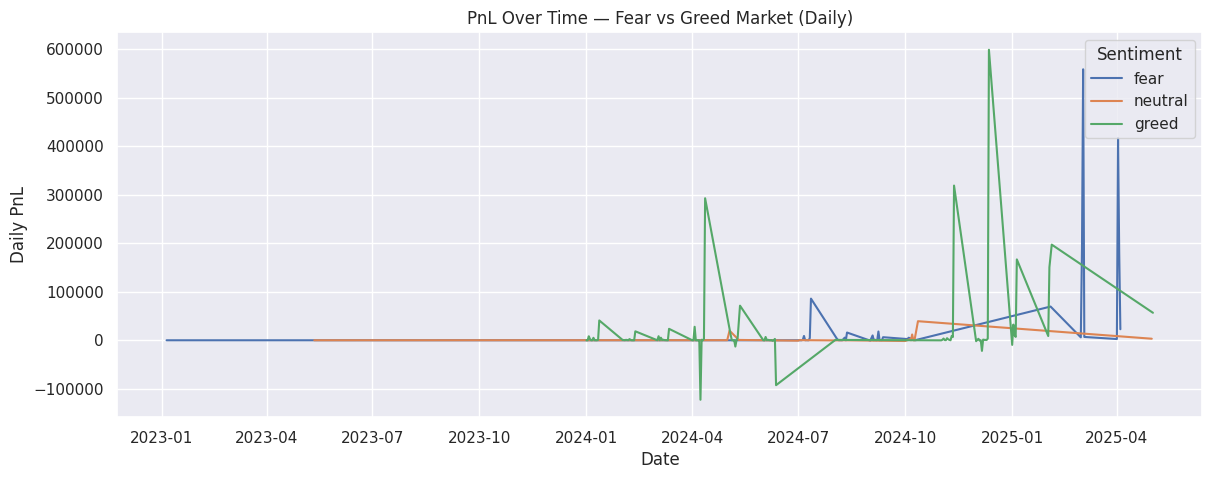

In [ ]:

plt.figure(figsize=(14,5))
sns.lineplot(data=daily_pnl, x='date', y='closedpnl', hue='classification')
plt.title('PnL Over Time — Fear vs Greed Market (Daily)')
plt.xlabel('Date')
plt.ylabel('Daily PnL')
plt.legend(title='Sentiment')
plt.savefig(os.path.join(OUT_DIR,'pnl_vs_sentiment_daily.png'))
plt.show()


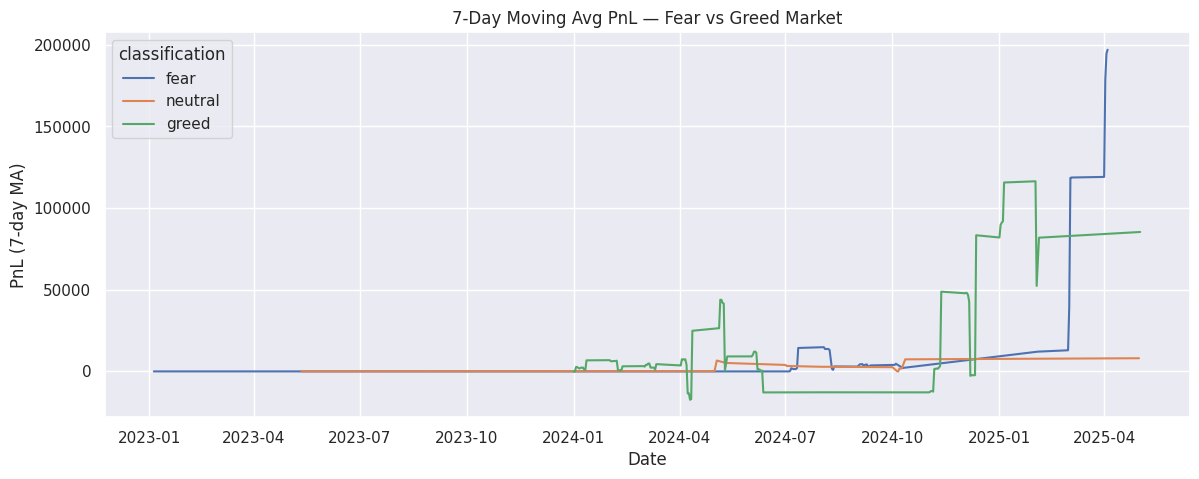

In [ ]:
daily_pnl['pnl_ma7'] = (
    daily_pnl
    .groupby('classification')['closedpnl']
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

plt.figure(figsize=(14,5))
sns.lineplot(data=daily_pnl, x='date', y='pnl_ma7', hue='classification')
plt.title('7-Day Moving Avg PnL — Fear vs Greed Market')
plt.xlabel('Date')
plt.ylabel('PnL (7-day MA)')
plt.savefig(os.path.join(OUT_DIR,'pnl_vs_sentiment_ma7.png'))
plt.show()


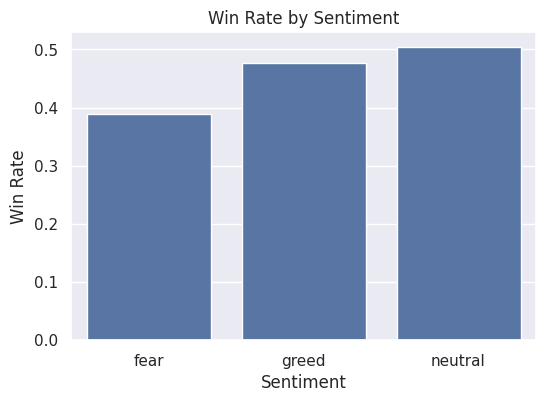

In [ ]:
win_rate = df.groupby('classification')['profit_flag'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=win_rate, x='classification', y='profit_flag')
plt.title('Win Rate by Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Sentiment')
plt.savefig(os.path.join(OUT_DIR,'winrate_vs_sentiment.png'))
plt.show()


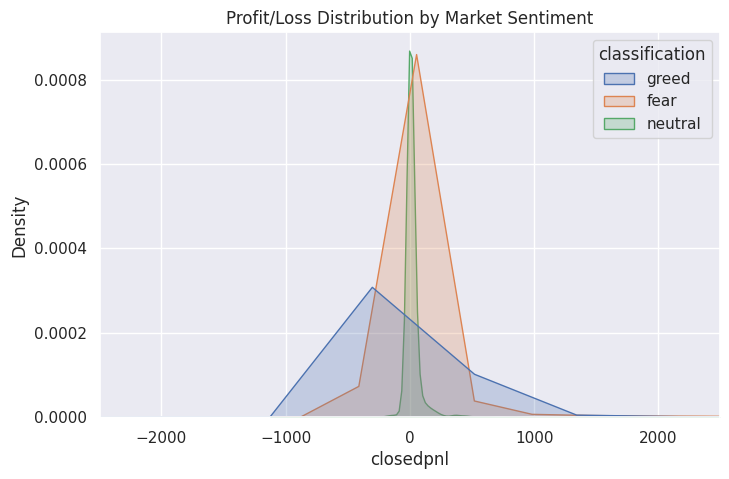

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='closedpnl', hue='classification', fill=True)
plt.xlim(-2*np.std(df['closedpnl']), 2*np.std(df['closedpnl']))
plt.title('Profit/Loss Distribution by Market Sentiment')
plt.savefig(os.path.join(OUT_DIR,'pnl_distribution_by_sentiment.png'))
plt.show()


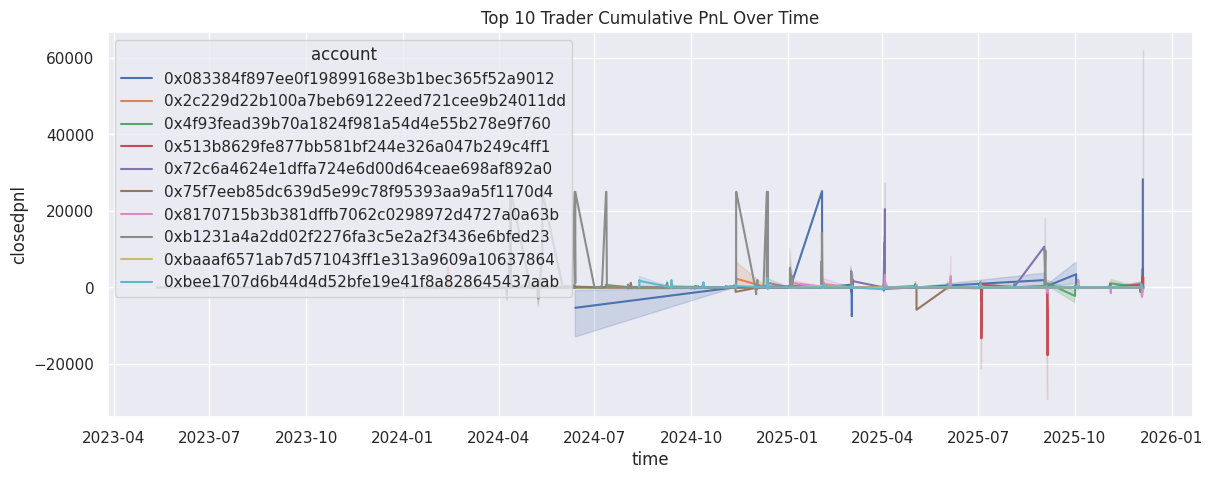

In [ ]:
top_traders = df.groupby('account')['closedpnl'].sum().sort_values(ascending=False).head(10).index
top_df = df[df['account'].isin(top_traders)]

plt.figure(figsize=(14,5))
sns.lineplot(data=top_df, x='time', y='closedpnl', hue='account')
plt.title('Top 10 Trader Cumulative PnL Over Time')
plt.savefig(os.path.join(OUT_DIR,'top_traders_pnl.png'))
plt.show()


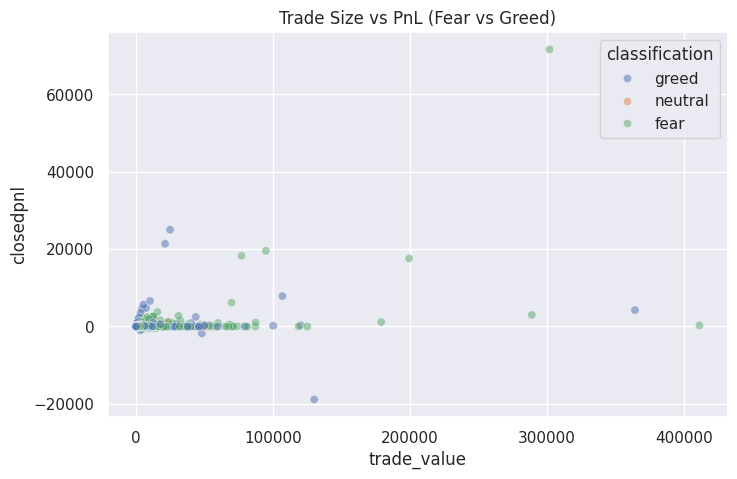

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df.sample(min(5000, len(df))), x='trade_value', y='closedpnl', hue='classification', alpha=0.5)
plt.title('Trade Size vs PnL (Fear vs Greed)')
plt.savefig(os.path.join(OUT_DIR,'trade_size_vs_pnl.png'))
plt.show()


In [78]:
print("Avg PnL by Sentiment:")
print(df.groupby('classification')['closedpnl'].mean())

print("\nWin Rate by Sentiment:")
print(df.groupby('classification')['profit_flag'].mean())

print("\nAvg Trade Size by Sentiment:")
print(df.groupby('classification')['trade_value'].mean())


Avg PnL by Sentiment:
classification
fear       110.865241
greed      115.378066
neutral     27.609742
Name: closedpnl, dtype: float64

Win Rate by Sentiment:
classification
fear       0.389896
greed      0.476992
neutral    0.504438
Name: profit_flag, dtype: float64

Avg Trade Size by Sentiment:
classification
fear       5498.809774
greed      4400.213443
neutral    4361.694101
Name: trade_value, dtype: float64
